<a href="https://colab.research.google.com/github/Code-tanisha/UPgrad-Python-Data-science-/blob/main/Pandas_IMDB_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Movies.csv to Movies.csv


In [3]:
data = pd.read_csv('Movies.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [5]:
data.shape

(3853, 28)

**Columns with Null values**

How many columns have null values present in them? Try writing code for this instead of counting them manually.

In [7]:
data.loc[:, data.isna().any()]

,color,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_2_name,actor_3_name,facenumber_in_poster,plot_keywords,language,content_rating,actor_2_facebook_likes,aspect_ratio
0,Color,723.0,178.0,855.0,Joel David Moore,Wes Studi,0.0,avatar|future|marine|native|paraplegic,English,PG-13,936.0,1.78
1,Color,302.0,169.0,1000.0,Orlando Bloom,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,English,PG-13,5000.0,2.35
2,Color,602.0,148.0,161.0,Rory Kinnear,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,English,PG-13,393.0,2.35
3,Color,813.0,164.0,23000.0,Christian Bale,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,English,PG-13,23000.0,2.35
4,Color,462.0,132.0,530.0,Samantha Morton,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,English,PG-13,632.0,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...
3848,Color,143.0,77.0,8.0,David Sullivan,Casey Gooden,0.0,changing the future|independent film|invention...,English,PG-13,45.0,1.85
3849,Color,35.0,80.0,0.0,Edgar Tancangco,Quynn Ton,0.0,jihad|mindanao|philippines|security guard|squa...,English,Not Rated,0.0,NaN
3850,Color,56.0,81.0,6.0,Peter Marquardt,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,Spanish,R,20.0,1.37
3851,Color,14.0,95.0,133.0,Caitlin FitzGerald,Daniella Pineda,1.0,written and directed by cast member,English,Not Rated,205.0,NaN


In [9]:
# Another method to find null values
print((data.isnull().sum()>0).sum())

12


**Dropping Columns**

What is the count of columns in the new dataframe?

In [10]:
data.shape

(3853, 28)

**Deriving a Metric**

Which column has the highest percentage of null values?

In [15]:
round(100*(data.isnull().sum()/len(data.index)),2)

color                        0.05
director_name                0.00
num_critic_for_reviews       0.03
duration                     0.03
director_facebook_likes      0.00
actor_3_facebook_likes       0.16
actor_2_name                 0.03
actor_1_facebook_likes       0.00
gross                        0.00
genres                       0.00
actor_1_name                 0.00
movie_title                  0.00
num_voted_users              0.00
cast_total_facebook_likes    0.00
actor_3_name                 0.16
facenumber_in_poster         0.16
plot_keywords                0.78
movie_imdb_link              0.00
num_user_for_reviews         0.00
language                     0.08
country                      0.00
content_rating               1.25
budget                       0.00
title_year                   0.00
actor_2_facebook_likes       0.03
imdb_score                   0.00
aspect_ratio                 1.87
movie_facebook_likes         0.00
dtype: float64

**Replacing Null values**

What is the count of movies made in the English language after replacing the NaN values with English?

In [17]:
# To replace the values, you can equate the entries with language column as null with 'English':

data.loc[pd.isnull(data['language']), ['language']] = 'English'


In [18]:
# Next, you can count the movies made in English:

(data.language == 'English').sum()

3674

**Sorting a dataframe**

Which movie is ranked 5th from the top in the list based on the net profit obtained?

Note: net profit = gross - budget

In [20]:
# You can create the column 'Profit' using the following code:

data['profit'] = data['gross'] - data['budget']

In [22]:
# Once you have the column ready, you can use the sort function:

top_10 = data.sort_values(by = 'profit', ascending = False).head(10)
top_10

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
28,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000,502177271.0
25,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000,458672302.0
2704,Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,13485,Kenny Baker,1.0,death star|empire|galactic war|princess|rebellion,http://www.imdb.com/title/tt0076759/?ref_=fn_t...,1470.0,English,USA,PG,11000000.0,1977.0,1000.0,8.7,2.35,33000,449935665.0
2748,Color,Steven Spielberg,215.0,120.0,14000.0,548.0,Dee Wallace,861.0,434949459.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,2811,Peter Coyote,0.0,bicyclist|boy|doll|star wars reference|voice i...,http://www.imdb.com/title/tt0083866/?ref_=fn_t...,515.0,English,USA,PG,10500000.0,1982.0,725.0,7.9,1.85,34000,424449459.0
16,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000,403279547.0
482,Color,Roger Allers,186.0,73.0,28.0,847.0,Nathan Lane,2000.0,422783777.0,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,6458,Niketa Calame,0.0,king|prince|scar|uncle|unnecessary guilt,http://www.imdb.com/title/tt0110357/?ref_=fn_t...,656.0,English,USA,G,45000000.0,1994.0,886.0,8.5,1.66,17000,377783777.0
230,Color,George Lucas,320.0,136.0,0.0,1000.0,Liam Neeson,20000.0,474544677.0,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,37723,Ian McDiarmid,1.0,alien|character says i have a bad feeling abou...,http://www.imdb.com/title/tt0120915/?ref_=fn_t...,3597.0,English,USA,PG,115000000.0,1999.0,14000.0,6.5,2.35,13000,359544677.0
64,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,57802,Morgan Freeman,0.0,based on comic book|dc comics|psychopath|star ...,http://www.imdb.com/title/tt0468569/?ref_=fn_t...,4667.0,English,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000,348316061.0
419,Color,Gary Ross,673.0,142.0,378.0,575.0,Josh Hutcherson,34000.0,407999255.0,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,49942,Anthony Reynolds,0.0,fight to the death|game|massacre|self survival...,http://www.imdb.com/title/tt1392170/?ref_=fn_t...,1959.0,English,USA,PG-13,78000000.0,2012.0,14000.0,7.3,2.35,140000,329999255.0


**Analysing dataframes**

Suppose movies are divided into 5 buckets based on the IMDb ratings:

[7.5, 8)

[8, 8.5)

[8.5, 9)

[9, 9.5)

[9.5, 10)

Which bucket holds the maximum number of movies from IMDb_Top_250?

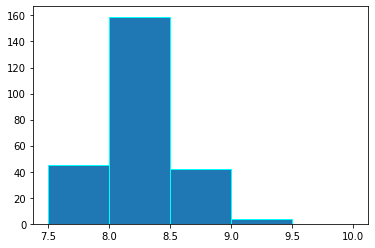

In [23]:
IMDb_Top_250 = data.sort_values(by = 'imdb_score', ascending = False)
IMDb_Top_250 = IMDb_Top_250.loc[IMDb_Top_250.num_voted_users > 25000]
IMDb_Top_250 = IMDb_Top_250.iloc[:250, ]
IMDb_Top_250['Rank'] = range(1,251)

import matplotlib.pyplot as plt
plt.hist(IMDb_Top_250['imdb_score'], bins = 5, range = (7.5,10), edgecolor = 'cyan')
plt.show()


**Operations on Dataframe**

Which actor is highest rated among the three actors according to the user reviews?

In [25]:
Meryl_Streep = data.loc[data.actor_1_name == 'Meryl Streep']
Leo_Caprio = data.loc[data.actor_1_name == 'Leonardo DiCaprio']
Brad_Pitt = data.loc[data.actor_1_name == 'Brad Pitt']
Combined = pd.concat([Meryl_Streep, Brad_Pitt, Leo_Caprio])
Combined_by_segment = Combined.groupby('actor_1_name')

Combined_by_segment['num_user_for_reviews'].mean()

actor_1_name
Brad Pitt            742.352941
Leonardo DiCaprio    914.476190
Meryl Streep         297.181818
Name: num_user_for_reviews, dtype: float64

**Operations on Dataframe**

Which actor is highest rated among the three actors according to the critics?

In [26]:
Meryl_Streep = data.loc[data.actor_1_name == 'Meryl Streep']
Leo_Caprio = data.loc[data.actor_1_name == 'Leonardo DiCaprio']
Brad_Pitt = data.loc[data.actor_1_name == 'Brad Pitt']
Combined = pd.concat([Meryl_Streep, Brad_Pitt, Leo_Caprio])
Combined_by_segment = Combined.groupby('actor_1_name')

Combined_by_segment['num_critic_for_reviews'].mean()

actor_1_name
Brad Pitt            245.000000
Leonardo DiCaprio    330.190476
Meryl Streep         181.454545
Name: num_critic_for_reviews, dtype: float64